In [16]:
import pandas as pd
import numpy as np
#import scikitlearn as skl

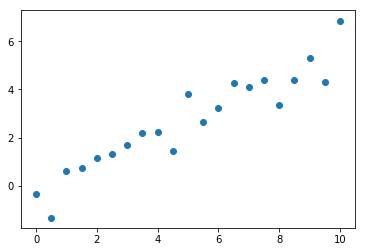

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

raw_inputs = np.linspace(0,10,21)
x = []
y = []
for val in raw_inputs:
    x.append(val)
    y.append(0.5*val + np.random.randn())
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
plt.scatter(x,y);

In [18]:
from sklearn.linear_model import LinearRegression #import the regression called "LinearRegression"

In [19]:
lr = LinearRegression() # Initialize the model

In [20]:
lr.fit(x,y) # "Fit" the model, which means "I want you to learn from my data!"

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
new_x = np.array([7,8,9]).reshape(-1,1)
predicted_y = lr.predict(new_x) # Predict for new data!
print(predicted_y)

[[3.89596632]
 [4.50165096]
 [5.10733559]]


In [22]:
from sqlalchemy import create_engine

In [23]:
POSTGRES_ADDRESS = '127.0.0.1' ## INSERT YOUR DB ADDRESS
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'ubuntu' ## CHANGE THIS TO YOUR POSTGRES USERNAME
POSTGRES_PASSWORD = 'astronomer' ## CHANGE THIS TO YOUR POSTGRES PASSWORD 
POSTGRES_DBNAME = 'postgres' ## CHANGE THIS TO YOUR DATABASE NAME 

In [24]:
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username=POSTGRES_USERNAME,
                        password=POSTGRES_PASSWORD,
                        ipaddress=POSTGRES_ADDRESS,
                        port=POSTGRES_PORT,
                        dbname=POSTGRES_DBNAME))

# Create the connection
#cnx = create_engine(postgres_str)

In [25]:
#pd.read_sql_query('''select trade_price_close from raw_all_trades_dependents where date_time between '2019-05-13' and '2019-05-24' and symbol = 'HSBC US Equity' order by date_time asc;''', cnx)

In [27]:
dependents = pd.read_csv('../data/data_formatted_master.csv')
dependents.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date_time,trade_price_open,trade_price_close,volume,symbol,predictor,industry
0,05/13/19 09:30 AM,18.77,18.8,33559,ABB US Equity,SMM8 Index,NaN
1,05/13/19 09:31 AM,18.795,18.79,27979,ABB US Equity,SMM8 Index,NaN
2,05/13/19 09:32 AM,18.79,18.78,3200,ABB US Equity,SMM8 Index,NaN
3,05/13/19 09:33 AM,18.78,18.7798,1774,ABB US Equity,SMM8 Index,NaN
4,05/13/19 09:34 AM,18.78,18.79,1046,ABB US Equity,SMM8 Index,NaN


In [30]:
predictors = pd.read_csv('../data/predictors_master.csv')
predictors.head()

,date_time,trade_price_open,trade_price_close,volume,symbol
0,5/13/2019 9:30,2827.25,2832.75,20983,ESM9 Index
1,5/13/2019 9:31,2832.5,2833.25,14798,ESM9 Index
2,5/13/2019 9:32,2833.25,2830,13015,ESM9 Index
3,5/13/2019 9:33,2830,2831.25,13216,ESM9 Index
4,5/13/2019 9:34,2831.25,2833.75,10634,ESM9 Index


In [31]:
dependents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577665 entries, 0 to 577664
Data columns (total 7 columns):
date_time            577665 non-null object
trade_price_open     577665 non-null object
trade_price_close    577665 non-null object
volume               577665 non-null object
symbol               577665 non-null object
predictor            18381 non-null object
industry             13088 non-null object
dtypes: object(7)
memory usage: 30.9+ MB


In [33]:
dependents.describe()

,date_time,trade_price_open,trade_price_close,volume,symbol,predictor,industry
count,577665,577665,577665,577665,577665,18381,13088
unique,12279,61438,61055,56037,134,4,5
top,5/17/19 15:59,8.04,1.65,100,TEVA US Equity,VGM8 Index,Autos
freq,85,612,599,54967,5486,9867,5338


In [34]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148853 entries, 0 to 148852
Data columns (total 5 columns):
date_time            148853 non-null object
trade_price_open     148853 non-null object
trade_price_close    148853 non-null object
volume               148853 non-null object
symbol               148853 non-null object
dtypes: object(5)
memory usage: 5.7+ MB


In [35]:
predictors.describe()

,date_time,trade_price_open,trade_price_close,volume,symbol
count,148853,148853,148853,148853,148853
unique,39209,5338,5446,16223,12
top,5/23/2019 12:21,1.1165,1.1165,0,GBPUSD Curncy
freq,6,564,564,41658,20790
